# McCabe Theile Graphical Method

In [11]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

Imports the necessary libraries to perform the analysis. Everytime you see the "x" from "as 'x'" above in the code below, means it is drawing the function from that library

## Input Given Data 

In [12]:
xd=0.95 #distillate percentage
xb=0.01 #bottoms percentage
zf=0.6 #feed percentage
q=0.389 #q value
R=1.3*1.22 #reflux ratio
L_V=R/(R+1)
Vb=1.3 #reboil ratio
a12=2.76  #relative volatility



## Developing the Equilibrium Curve

In [13]:
x1=np.linspace(0,1,1000001)
y45=x1
#x1 defines the liquid mole fraction of the first component
y1=a12*x1/(1+x1*(a12-1))

## Rectifying Section Operating Line

In [14]:
D_V=1/(R+1)
RSOL=L_V*x1+D_V*xd

## q-Line

In [15]:
def intersect(y1,x1,y2,x2):
    yindex=np.isclose(y1,y2,0.01)
    for i in range(len(y1)):
        if yindex[i]==True:
            yint=y1[i]
            xint=x1[i]
    return [xint,yint]      

In [16]:
yq=(q/(q-1))*x1-zf/(q-1)
[xint,yint]=intersect(yq,x1,RSOL,x1)
print [xint,yint]

[0.49709899999999996, 0.66551307528641579]


## Stripping Section Operating Line

In [17]:
m=(yint-xb)/(xint-xb)
SSOL=m*(x1-xint)+yint

## Step Off Stages Function

In [18]:
def stage_step_off(x,yeq,RSOL,SSOL,q,xd,xb,xint,yint):
    xd1=xd
    k=0
    while xd>xint:
        #first do the horizantal step off
       
        if k==0:
            ystep=xd*np.ones(len(x)) #makes horizantal line
            eqx=intersect(yeq,x,ystep,x) #finds intersection of equlibrium curve and the horizantal line
            print eqx
            xhstep=np.linspace(eqx[0],xd,10)
            yhstep=xd*np.ones(len(xhstep))
            k=k+1
            
        else:
            ystep=RSOLy*np.ones(len(x))
            RSOLx=L_V*xd+D_V*xd1
            eqx=intersect(yeq,x,ystep,x)
            print eqx #finds intersection of equlibrium curve and the horizantal line
            xhstep=np.linspace(eqx[0],xd,10)
            yhstep=RSOLy*np.ones(len(xhstep))
            k=k+1
       

        #now to do the verticle step! 
        RSOLy=L_V*eqx[0]+D_V*xd1
        xvstep=eqx[0]*np.ones(10)
        yvstep=np.linspace(RSOLy,eqx[1],len(xvstep))
        plt.plot(xhstep,yhstep,'r')
        plt.plot(xvstep,yvstep,'r')
        xd=eqx[0]
        
            
    #finish the drop down to the SSOL from equilibrium cuve it should have stopped at the RSOL
    SSOLy=(m*(xd-xint)+yint)
    xb1=xd*np.ones(10)
    SSOLvstep=np.linspace(RSOLy,SSOLy,len(xb1))
   
    plt.plot(xb1,SSOLvstep,'r')
    xb1=xd
    SSOLy=(m*(xd-xint)+yint)
    #continue stepping off stages between equilibrium curve and SSOL
    while xb1>=xb:
        ystep=SSOLy*np.ones(len(x))
        SSOLx=m*(xb1-xint)+yint
        eqx=intersect(yeq,x,ystep,x) #finds intersection of equlibrium curve and the horizantal line
        print eqx
        xhstep=np.linspace(eqx[0],xb1,10)
        yhstep=SSOLy*np.ones(len(xhstep))

        #now to do the verticle step! 
        SSOLy=m*(xb1-xint)+yint
        xvstep=eqx[0]*np.ones(10)
        yvstep=np.linspace(SSOLy,eqx[1],len(xvstep))
        plt.plot(xhstep,yhstep,'r')
        plt.plot(xvstep,yvstep,'r')
        xb1=eqx[0]
       
    

## McCabe Theile Plot

Your equilibrium intersections are:
[0.89565699999999993, 0.95949977912993023]
[0.81894499999999992, 0.92583795674446767]
[0.72339799999999999, 0.87831938447755808]
[0.62134599999999995, 0.81913468950170143]
[0.52876999999999996, 0.75591970974112555]
[0.45643299999999998, 0.69857464397042157]
[0.36845600000000001, 0.61689373286424098]
[0.36845600000000001, 0.61689373286424098]
[0.26386599999999999, 0.49731500353017294]
[0.26386599999999999, 0.49731500353017294]
[0.166355, 0.35515562992386668]
[0.166355, 0.35515562992386668]
[0.094002999999999989, 0.22261729868604385]
[0.094002999999999989, 0.22261729868604385]
[0.048902999999999995, 0.12427593937653772]
[0.048902999999999995, 0.12427593937653772]
[0.023771999999999998, 0.062975889396777257]
[0.023771999999999998, 0.062975889396777257]
[0.010636999999999999, 0.028818603466275437]
[0.010636999999999999, 0.028818603466275437]
[0.0040010000000000002, 0.01096554327598093]


[0, 1, 0, 1]

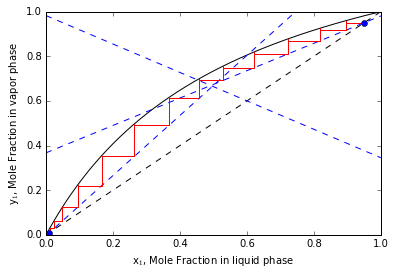

In [19]:
plt.plot(x1, y1,'k')
plt.plot(x1,y45, 'k--')
plt.plot(x1,RSOL,'b--')
plt.plot(x1,yq,'b--')
plt.plot(x1,SSOL,'b--')
print 'Your equilibrium intersections are:'
stepoffRSOL=stage_step_off(x1,y1,RSOL,SSOL,q,xd,xb,xint,yint)
plt.plot([xb,xd],[xb,xd],'o')
plt.xlabel('x$_1$, Mole Fraction in liquid phase')
plt.ylabel('y$_1$, Mole Fraction in vapor phase')
plt.axis([0,1,0,1])